Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


TASK-02: Image Generation
Loading model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model loaded!
Using 5 prompts

Generating images...
Generating image 1: A futuristic city with flying ...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: images/image_1.png
Generating image 2: An astronaut riding a horse on...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: images/image_2.png
Generating image 3: A cat wearing a wizard hat, fa...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: images/image_3.png
Generating image 4: Cyberpunk street market at nig...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: images/image_4.png
Generating image 5: Peaceful lake in a fantasy for...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: images/image_5.png


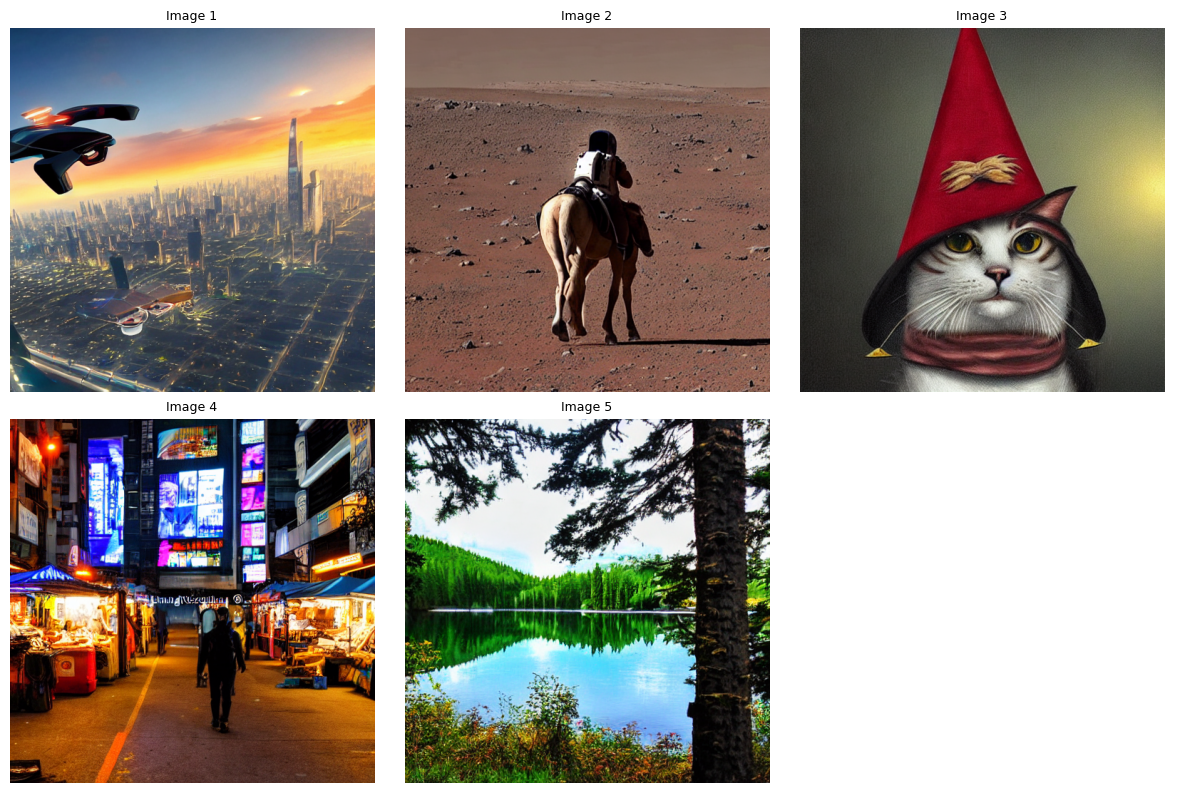


Generated files:
- images/image_1.png to image_5.png
- all_images.png (grid)
- prompts.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ============================================
# TASK-02: Image Generation with Stable Diffusion
# ============================================

# Install libraries
!pip install diffusers transformers accelerate torch pillow -q

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import os

print("TASK-02: Image Generation")
print("=" * 50)

# Load model
print("Loading model...")
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")
pipe.enable_attention_slicing()
print("Model loaded!")

# Prompts
prompts = [
    "A futuristic city with flying cars at sunset",
    "An astronaut riding a horse on Mars",
    "A cat wearing a wizard hat, fantasy art",
    "Cyberpunk street market at night",
    "Peaceful lake in a fantasy forest"
]

print(f"Using {len(prompts)} prompts")

# Create output directory
os.makedirs("images", exist_ok=True)

# Generate images
print("\nGenerating images...")

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i, prompt in enumerate(prompts):
    print(f"Generating image {i+1}: {prompt[:30]}...")

    image = pipe(
        prompt,
        height=512,
        width=512,
        num_inference_steps=30,
        guidance_scale=7.5
    ).images[0]

    filename = f"images/image_{i+1}.png"
    image.save(filename)

    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}", fontsize=9)
    axes[i].axis('off')

    print(f"Saved: {filename}")

# Hide unused subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig("all_images.png", dpi=120)
plt.show()

# Create prompt file
with open("prompts.txt", "w") as f:
    for i, prompt in enumerate(prompts, 1):
        f.write(f"Image {i}: {prompt}\n")

print("\n" + "=" * 50)
print("Generated files:")
print("- images/image_1.png to image_5.png")
print("- all_images.png (grid)")
print("- prompts.txt")
print("=" * 50)

# Download
from google.colab import files
for i in range(1, 6):
    files.download(f"images/image_{i}.png")
files.download("all_images.png")
files.download("prompts.txt")